A SIRS model is based upon the regular SIR model previously described. In the regular SIR model the recovered individuals of the population are immune towards the disease, and can thus not be reinfected. In a SIRS model, individuals that have been infected can reenter a susceptible state upon recovery and become reinfected, hence expanding the SIR model by an additional susceptible (S) compartment.

The rate of reentering the susceptible state upon recovery is, like the infection rate and the recovery rate, based on probabilities. This new possibility of reentry into the susceptible state may introduce cyclic behavior, if the parameters are set optimally for this specific behavior. 

The outcome of the SIRS model was tested at three different paramter settings for each of the three parameter values. To evaluate the performance, 100 SIRS models was computed for each set of paramters and three quantitive measurements was computed: 
- Confidence intervals of maximum infected individuals  
- Confidence intervals for the time at maximum infected indivuals
- The fraction of simulations that demonstrate cyclic behavior with the given parameter values

Regarding the cyclic events, we assumed that if the disease was still present in the population at day 5000 (more than 13 years), the disease showed cyclic behavior. 

In [1]:
# Initialization
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from tabulate import tabulate

In [2]:
# Individuals
n = 1000

# Probabilities of entering 
prob_S_I_vector = np.array([0.9,0.8,0.7])
prob_I_R_vector = np.array([0.3,0.5,0.8])
prob_R_S_vector = np.array([0.015,0.03,0.045])

results = np.empty((1,6))

# Run loop for 100
n_runs = 100

for prob_S_I in prob_S_I_vector:
    for prob_I_R in prob_I_R_vector:
        for prob_R_S in prob_R_S_vector:

            # Initializing quantitative measurements 
            max_I_array = np.array([])
            t_max_I_array = np.array([])
            cyclic = np.zeros(n_runs)
            
            for i in range(n_runs):
                time_count = 0
                
                # Vector of states
                states = np.repeat("S",n)
                states[0] = "I"

                n_S = np.array([len(np.where(states == "S")[0])])
                n_I = np.array([len(np.where(states == "I")[0])])
                n_R = np.array([len(np.where(states == "R")[0])])
                
                while "I" in states:
                    time_count += 1

                    # Get positions of S, I, R
                    S_index = np.where(states == "S")[0]
                    I_index = np.where(states == "I")[0]
                    R_index = np.where(states == "R")[0]

                    # Update susceptible
                    prob_S_I_t = prob_S_I * len(I_index)/n
                    states[S_index] = np.random.choice(np.array(["S","I"]),p = np.array([1-prob_S_I_t, prob_S_I_t]), size = len(S_index))

                    # Update infected
                    states[I_index] = np.random.choice(np.array(["I", "R"]),p = np.array([1-prob_I_R, prob_I_R]), size = len(I_index))

                    # Update recovered
                    states[R_index] = np.random.choice(np.array(["R", "S"]),p = np.array([1-prob_R_S, prob_R_S]), size = len(R_index))

                    n_S = np.concatenate([n_S, np.array([len(np.where(states == "S")[0])])])
                    n_I = np.concatenate([n_I, np.array([len(np.where(states == "I")[0])])])
                    n_R = np.concatenate([n_R, np.array([len(np.where(states == "R")[0])])])
                    
                    #if (time_count > 1000):
                    if time_count > 3000: 
                        cyclic[i] = 1
                        break 
            
                # Quantitative measurements 
                max_I_array = np.concatenate([max_I_array, np.array([np.max(n_I)])])
                t_max_I_array = np.concatenate([t_max_I_array, np.array([float(np.where(n_I == max(n_I))[0][0])])])
                frac_cyclic = sum(cyclic)/len(cyclic)
            
            # Statistics with quantitative 
            mean_max_I = np.mean(max_I_array)
            mean_t_max_I = np.mean(t_max_I_array)
            std_max_I = np.std(max_I_array)
            std_t_max_I = np.std(t_max_I_array)

            # Confidence intervals 
            import scipy.stats as stats
            CI_max_I = stats.norm.interval(alpha=0.95, loc=np.mean(max_I_array), scale=stats.sem(max_I_array))
            CI_t_max_I = stats.norm.interval(alpha=0.95, loc=np.mean(t_max_I_array), scale=stats.sem(t_max_I_array))
            
            # Update statistics results for every paramter
            stats = (prob_S_I, prob_I_R, prob_R_S, np.round(CI_max_I,2), np.round(CI_t_max_I,2), frac_cyclic)
            results = np.vstack((results, stats))


In [3]:
print(tabulate(results[1:,], headers=["S --> I","I --> R","R --> S", "CI for mean I max", "CI for mean time at I max", "Cylic fraction"], tablefmt='orgtbl'))

|   S --> I |   I --> R |   R --> S | CI for mean I max   | CI for mean time at I max   |   Cylic fraction |
|-----------+-----------+-----------+---------------------+-----------------------------+------------------|
|       0.9 |       0.3 |     0.015 | [256.27 308.77]     | [11.39 13.81]               |             0    |
|       0.9 |       0.3 |     0.03  | [213.84 275.74]     | [ 9.9 12.8]                 |             0.7  |
|       0.9 |       0.3 |     0.045 | [261.89 315.41]     | [11.79 14.27]               |             0.82 |
|       0.9 |       0.5 |     0.015 | [66.83 95.17]       | [ 8.45 12.05]               |             0    |
|       0.9 |       0.5 |     0.03  | [65.34 93.98]       | [ 8.62 12.44]               |             0    |
|       0.9 |       0.5 |     0.045 | [ 74.76 103.56]     | [ 0.62 50.22]               |             0.05 |
|       0.9 |       0.8 |     0.015 | [3.59 6.57]         | [2.87 6.03]                 |             0    |
|       0.9 |      

The above table consists of the quantitative measurements at the different parameter values. For many of the simulations, the confidence intervals for the mean of maximum number of infected individuals indicate that the disease was extinct rather quickly after the outbreak. This hypothesis is further backed up by the cyclic fraction, which are 0 for many of these cases. Meanwhile, the simulations that does indeed demonstrate cyclic behavior, have a higher confidence interval for the mean of maximum number of infected individuals. One tendency in the above table is that the number of infected individuals is maximized within the first 14 days, with few outliers.  

Some simulations may be somewhat cyclic i.e. starting out cyclic and with time get less flucturating and ultimately reaching a disease free state. As the assumption on cyclic behavior is that a disease is cyclic if there is still disease present in the population at day 5000, such simulations may not be contained in the table. 

To further examine cyclic behavior, we look closer into a run with a high cyclic fraction. A scenario with parameter values of prob_S_I = $0.9$, prob_I_R = $0.3$ and prob_R_S = $0.045$, yields a cyclic fraction of $0.82$, meaning that the SIRS model demonstrate cyclic behavior in $82\%$ of the 100 runs. A simulation with the given parameters is plotted below

In [8]:
# Individuals
n = 1000

# Probabilities of entering 
prob_S_I = 0.9
prob_I_R = 0.3
prob_R_S = 0.045

# Initializing quantitative measurements 
max_I_array = np.array([])
t_max_I_array = np.array([])
cyclic = np.zeros(n_runs)

# Vector of states
states = np.repeat("S",n)
states[0] = "I"
time_count=0

n_S = np.array([len(np.where(states == "S")[0])])
n_I = np.array([len(np.where(states == "I")[0])])
n_R = np.array([len(np.where(states == "R")[0])])

while "I" in states:
    time_count += 1

    # Get positions of S, I, R
    S_index = np.where(states == "S")[0]
    I_index = np.where(states == "I")[0]
    R_index = np.where(states == "R")[0]

    # Update susceptible
    prob_S_I_t = prob_S_I * len(I_index)/n
    states[S_index] = np.random.choice(np.array(["S","I"]),p = np.array([1-prob_S_I_t, prob_S_I_t]), size = len(S_index))

    # Update infected
    states[I_index] = np.random.choice(np.array(["I", "R"]),p = np.array([1-prob_I_R, prob_I_R]), size = len(I_index))

    # Update recovered
    states[R_index] = np.random.choice(np.array(["R", "S"]),p = np.array([1-prob_R_S, prob_R_S]), size = len(R_index))

    n_S = np.concatenate([n_S, np.array([len(np.where(states == "S")[0])])])
    n_I = np.concatenate([n_I, np.array([len(np.where(states == "I")[0])])])
    n_R = np.concatenate([n_R, np.array([len(np.where(states == "R")[0])])])
    
    if time_count > 5000: 
        break 

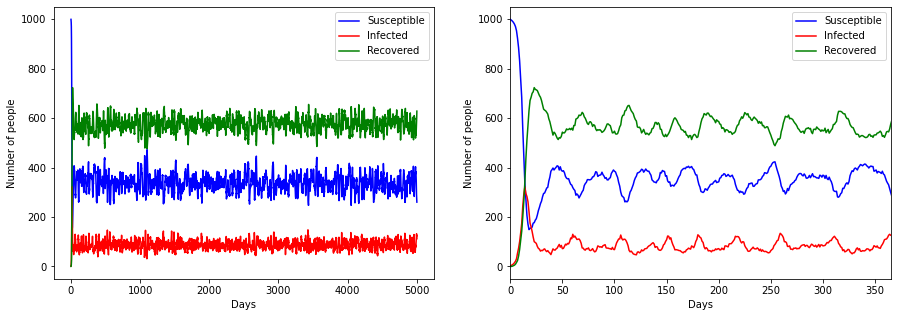

In [9]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(n_S, "-b", label = "Susceptible")
plt.plot(n_I, "-r", label = "Infected")
plt.plot(n_R, "-g", label = "Recovered")
plt.ylabel("Number of people")
plt.xlabel("Days")
plt.legend()
plt.subplot(122)
plt.plot(n_S, "-b", label = "Susceptible")
plt.plot(n_I, "-r", label = "Infected")
plt.plot(n_R, "-g", label = "Recovered")
plt.ylabel("Number of people")
plt.xlabel("Days")
plt.xlim(0,365)
plt.legend()
plt.show()

These plots represent two segments of the same simulation, of 5000 days and 365 days, respectively. It is clear that this simulation demonstrates cyclic behavior, which can only be achieved as the recovered individuals can become reinfected. It seems that this simulation demonstrates constant cyclic behavior, why the disease may never be eradicated. 

In the above simulation it is indicated that this disease has approximately $8$ cycles in a year, based on the number of peaks of infected individuals, meaning that one individual can potentially get reinfected several times. However, this is unlikely to be the case, as only approximately 100 people is infected at any given time. 